**Buổi học ngày 21/10**




In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

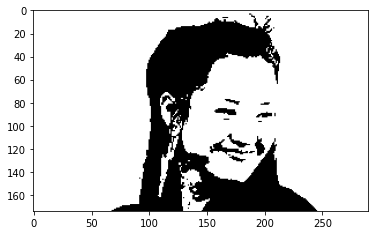

In [ ]:
img = cv2.imread('/content/drive/MyDrive/XuLyAnh/NhamDoanhDoanh.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,img= cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
img1 = copy.copy(img)
#muc dich de luu tru hinh anh goc ban dau

**DILATION**

In [ ]:
def dilation(img, kernel,max=255):#cai nay chi xu dung cho hinh anh den trang thoi va phu hop voi kernel dau vao la 3*3
  m,n= img.shape
  zero = np.zeros((m+2,n+2))
  zero[1:(m+1),1:(n+1)]= img
  zero1= copy.copy(zero)
  for i in np.arange(1,m+1):
    for j in np.arange(1,n+1):
      ok = np.sum(zero1[i-1:i+2,j-1:j+2]* kernel)
      if ok >0:
        zero[i,j]=max
      else:
        zero[i,j]=0
  return zero[1:m+1,1:n+1]
  

bài trên lớp

với hình ảnh mẫu

In [ ]:
kernel = np.array([
                   [1,1,1],
                   [1,1,1],
                   [1,1,1]
])

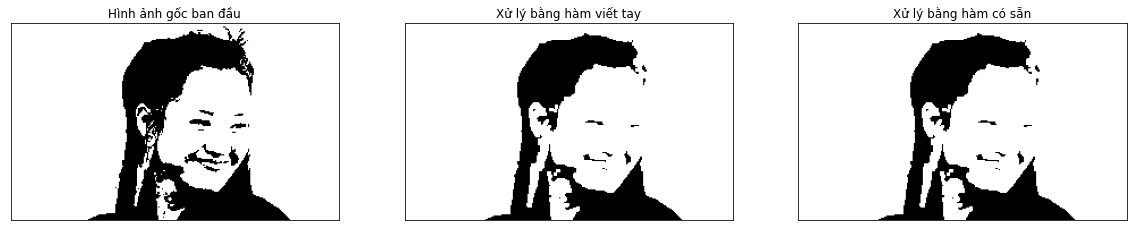

In [ ]:
imageH= copy.copy(img1)
imageT= copy.copy(img1)
imageT = dilation(imageT,kernel)
imageH= cv2.dilate(imageH, kernel, iterations=1)

plt.figure(figsize=(20,8))
plt.subplot(131) , plt.imshow(img1, cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(132) , plt.imshow(imageT, cmap="gray"), plt.title("Xử lý bằng hàm viết tay")
plt.xticks([]), plt.yticks([])
plt.subplot(133) , plt.imshow(imageH, cmap="gray"), plt.title("Xử lý bằng hàm có sẵn")
plt.xticks([]), plt.yticks([])
plt.show()

**EROSION**

In [ ]:
def erosion(img, kernel,max=255): #kernel dau vao mac dinh la 3*3 nhe
  m,n= img.shape
  sumk= np.sum(kernel)*max
  zero = np.zeros((m+2,n+2))
  zero[1:(m+1),1:(n+1)]= img
  zero1= copy.copy(zero)
  for i in np.arange(1,m+1):
    for j in np.arange(1,n+1):
      ok = np.sum(zero1[i-1:i+2,j-1:j+2]* kernel)
      if ok == sumk:
        zero[i,j]=max
      else:
        zero[i,j]=0
  return zero[1:m+1,1:n+1]

bài trên lớp

In [ ]:
#ví dụ số 1
I = np.array(
    [
     [0,0,0,0,1,0,0,0,0,0],
     [0,0,0,1,1,0,0,0,0,0],
     [0,0,1,1,1,1,1,0,0,0],
     [0,0,1,1,1,1,1,1,0,0],
     [1,1,1,1,1,1,1,1,0,0],
     [0,1,1,1,1,1,1,1,1,1],
     [0,0,1,1,1,1,1,1,0,0],
     [0,0,0,1,1,1,1,1,0,0],
     [0,0,0,1,1,1,1,0,0,0],
     [0,0,0,0,0,1,0,0,0,0]
    ]
)

B= np.array(
    [
    [0,0,0],
    [1,1,1],
    [0,0,0]
    ]
)

erosion(I,B,1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#ví dụ số 2
I1 = np.array(
    [
     [0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0],
     [0,0,1,1,1,1,1,0,0,0],
     [0,0,1,1,1,1,1,1,0,0],
     [0,0,1,1,1,1,1,1,0,0],
     [0,0,1,1,1,1,1,1,0,0],
     [0,0,1,1,1,1,1,1,0,0],
     [0,0,0,1,1,1,1,1,0,0],
     [0,0,0,1,1,1,1,0,0,0],
     [0,0,0,0,0,0,0,0,0,0]
    ]
)

B1 = np.array(
    [
     [0,1,0],
     [1,1,1],
     [0,1,0]
    ]
)

erosion(I1,B1,1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

hình ảnh mẫu

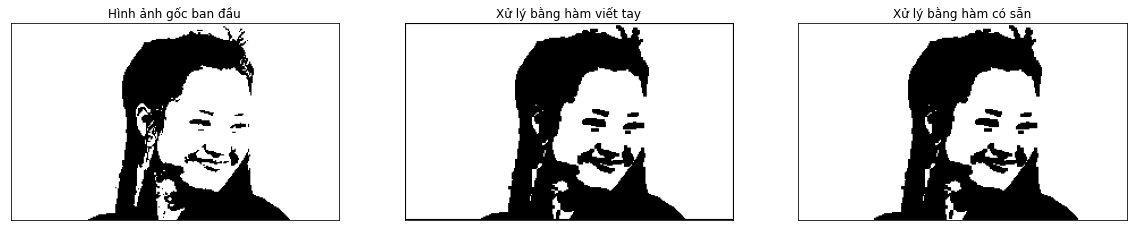

In [ ]:
imageH1= copy.copy(img1)
imageT1= copy.copy(img1)
imageT1 = erosion(imageT1,kernel)
imageH1= cv2.erode(imageH1, kernel, iterations=1)

plt.figure(figsize=(20,6))
plt.subplot(131) , plt.imshow(img1, cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(132) , plt.imshow(imageT1, cmap="gray"), plt.title("Xử lý bằng hàm viết tay")
plt.xticks([]), plt.yticks([])
plt.subplot(133) , plt.imshow(imageH1, cmap="gray"), plt.title("Xử lý bằng hàm có sẵn")
plt.xticks([]), plt.yticks([])
plt.show()

**OPEN**

In [ ]:
def open(image,kernel,max=255):
  return dilation((erosion(image,kernel,max)),kernel,max)

bài trên lớp

In [ ]:
I3 = np.array(
    [
     [0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,1,1,0,0,0,0],
     [0,0,1,1,1,1,1,1,0,0],
     [0,0,1,1,1,1,1,1,0,0],
     [0,1,1,1,1,1,1,1,1,0],
     [0,1,1,1,1,1,1,1,1,0],
     [0,0,1,1,1,1,1,1,0,0],
     [0,0,1,1,1,1,1,1,0,0],
     [0,0,0,0,1,1,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0]
    ]
)

B3 = np.array(
    [
     [1,0,0],
     [0,1,0],
     [0,0,1]
    ]
)


Phép erosion trc: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Sau đó thực hiện phép giãn cx kết quả phép mở
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


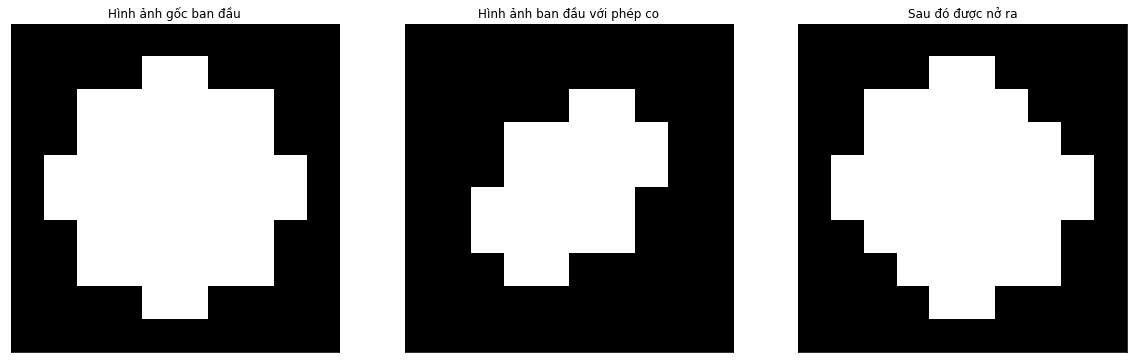

In [ ]:
#ví dụ 3.1

print("Phép erosion trc: ")
print(erosion(I3,B3,1))
print("Sau đó thực hiện phép giãn cx kết quả phép mở")
print(open(I3,B3,1))

plt.figure(figsize=(20,20))
plt.subplot(131) , plt.imshow(I3, cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(132) , plt.imshow(erosion(I3,B3,1), cmap="gray"), plt.title("Hình ảnh ban đầu với phép co")
plt.xticks([]), plt.yticks([])
plt.subplot(133) , plt.imshow(open(I3,B3,1), cmap="gray"), plt.title("Sau đó được nở ra")
plt.xticks([]), plt.yticks([])
plt.show()

hình ảnh mẫu

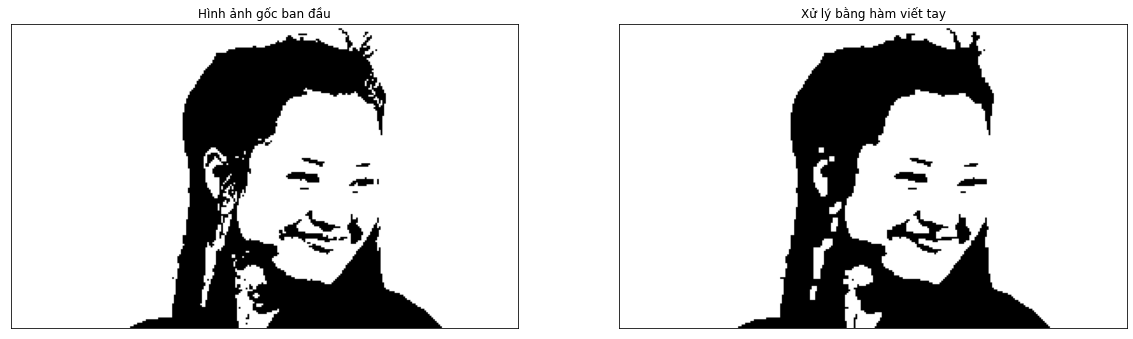

In [ ]:
imageT2 = copy.copy(img1)
imageT2 = open(imageT2,kernel)

plt.figure(figsize=(20,20))
plt.subplot(121) , plt.imshow(img1, cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(imageT2, cmap="gray"), plt.title("Xử lý bằng hàm viết tay")
plt.xticks([]), plt.yticks([])
plt.show()

**CLOSE**

In [ ]:
def close(image,kernel,max=255):
  return erosion((dilation(image,kernel,max)),kernel,max)

bài tập trên lớp

Phép giãn trc: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Sau đó thực hiện phép co cx kết quả phép đóng
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


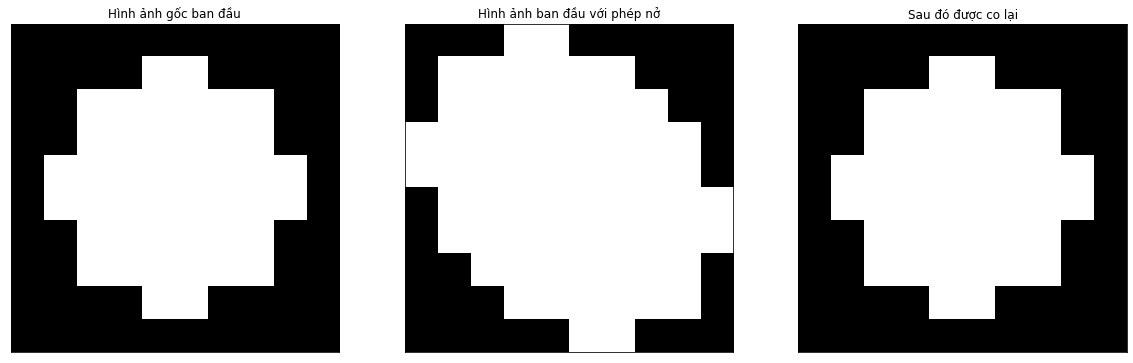

In [ ]:
#ví dụ 3.2

print("Phép giãn trc: ")
print(erosion(I3,B3,1))
print("Sau đó thực hiện phép co cx kết quả phép đóng")
print(open(I3,B3,1))

plt.figure(figsize=(20,20))
plt.subplot(131) , plt.imshow(I3, cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(132) , plt.imshow(dilation(I3,B3,1), cmap="gray"), plt.title("Hình ảnh ban đầu với phép nở")
plt.xticks([]), plt.yticks([])
plt.subplot(133) , plt.imshow(close(I3,B3,1), cmap="gray"), plt.title("Sau đó được co lại")
plt.xticks([]), plt.yticks([])
plt.show()

hình ảnh mẫu

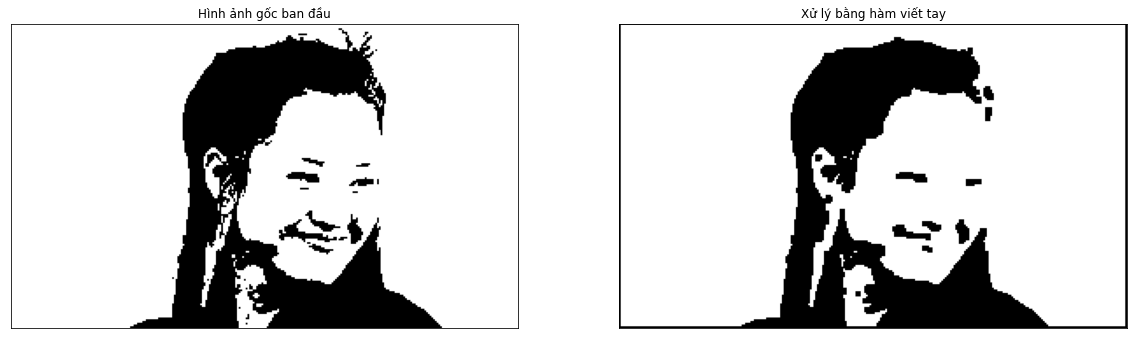

In [ ]:
imageT3 = copy.copy(img1)
imageT3 = close(imageT3,kernel)

plt.figure(figsize=(20,20))
plt.subplot(121) , plt.imshow(img1, cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(imageT3, cmap="gray"), plt.title("Xử lý bằng hàm viết tay")
plt.xticks([]), plt.yticks([])
plt.show()

**PHÉP TRỪ ẢNH**


In [ ]:
def TruAnhErosion(image,kernel,max=255):
  return image - erosion(image,kernel,max)

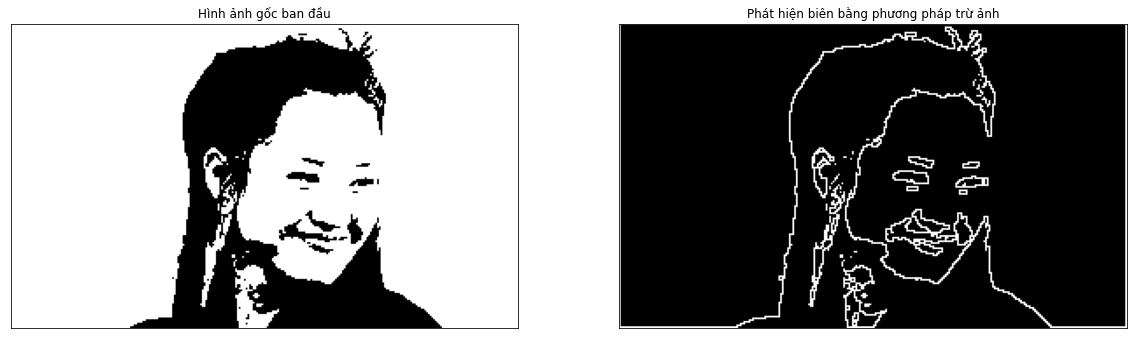

In [ ]:
imageT4 = copy.copy(img1)
imageT4 = TruAnhErosion(imageT4,kernel)

plt.figure(figsize=(20,20))
plt.subplot(121) , plt.imshow(img1, cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(imageT4, cmap="gray"), plt.title("Phát hiện biên bằng phương pháp trừ ảnh")
plt.xticks([]), plt.yticks([])
plt.show()

**Buổi học ngày 28/10**

Ví dụ số 1, hình ảnh xóa nhiễu

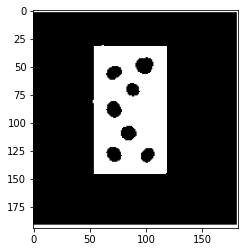

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/XuLyAnh/XoaNhieuBangHinhThai.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret,image1= cv2.threshold(image1,127,255,cv2.THRESH_BINARY)
plt.imshow(image1, cmap="gray")
plt.show()

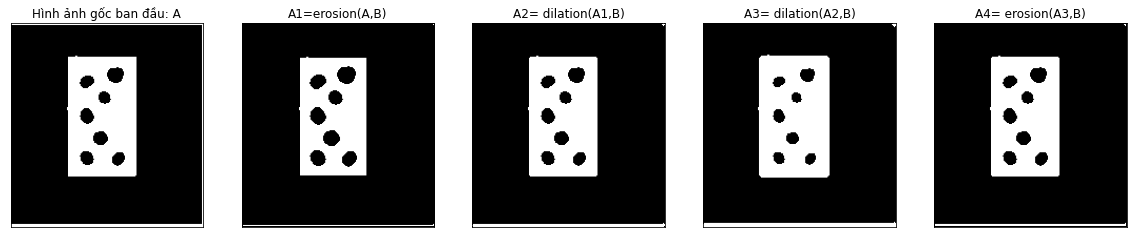

In [ ]:
image11 = copy.deepcopy(image1)

image11 = erosion(image11,B1)
image12 = copy.deepcopy(image11)

image12 = dilation(image12,B1)
image13 = copy.deepcopy(image12)

image13 = dilation(image13,B1)
image14 = copy.deepcopy(image13)

image14 = erosion(image14,B1)

plt.figure(figsize=(20,20))
plt.subplot(151) , plt.imshow(image1, cmap="gray"), plt.title("Hình ảnh gốc ban đầu: A")
plt.xticks([]), plt.yticks([])
plt.subplot(152) , plt.imshow(image11, cmap="gray"), plt.title("A1=erosion(A,B)")
plt.xticks([]), plt.yticks([])
plt.subplot(153) , plt.imshow(image12, cmap="gray"), plt.title("A2= dilation(A1,B)")
plt.xticks([]), plt.yticks([])
plt.subplot(154) , plt.imshow(image13, cmap="gray"), plt.title("A3= dilation(A2,B)")
plt.xticks([]), plt.yticks([])
plt.subplot(155) , plt.imshow(image14, cmap="gray"), plt.title("A4= erosion(A3,B)")
plt.xticks([]), plt.yticks([])
plt.show()

Ví dụ hình ảnh số 2

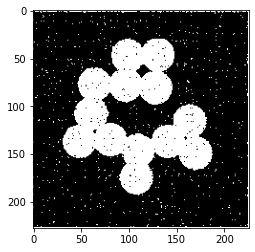

In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/XuLyAnh/XoaNhieuBangHinhThai1.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret,image2= cv2.threshold(image2,127,255,cv2.THRESH_BINARY)
plt.imshow(image2, cmap="gray")
plt.show()

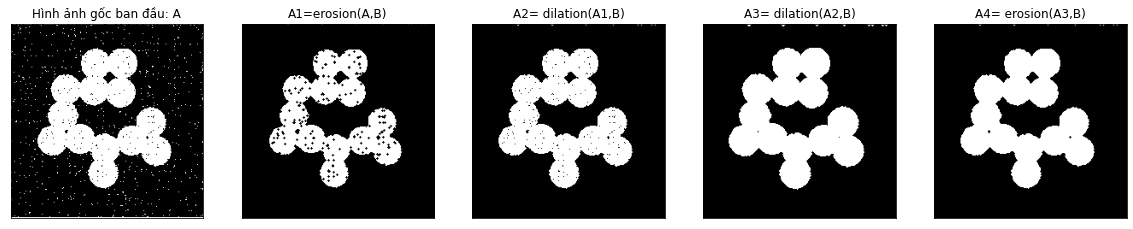

In [ ]:
image21 = copy.deepcopy(image2)

image21 = erosion(image21,B1)
image22 = copy.deepcopy(image21)

image22 = dilation(image22,B1)
image23 = copy.deepcopy(image22)

image23 = dilation(image23,B1)
image24 = copy.deepcopy(image23)

image24 = erosion(image24,B1)

plt.figure(figsize=(20,20))
plt.subplot(151) , plt.imshow(image2, cmap="gray"), plt.title("Hình ảnh gốc ban đầu: A")
plt.xticks([]), plt.yticks([])
plt.subplot(152) , plt.imshow(image21, cmap="gray"), plt.title("A1=erosion(A,B)")
plt.xticks([]), plt.yticks([])
plt.subplot(153) , plt.imshow(image22, cmap="gray"), plt.title("A2= dilation(A1,B)")
plt.xticks([]), plt.yticks([])
plt.subplot(154) , plt.imshow(image23, cmap="gray"), plt.title("A3= dilation(A2,B)")
plt.xticks([]), plt.yticks([])
plt.subplot(155) , plt.imshow(image24, cmap="gray"), plt.title("A4= erosion(A3,B)")
plt.xticks([]), plt.yticks([])
plt.show()

ví dụ số 3

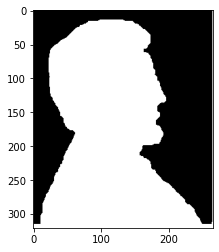

In [ ]:
image3 = cv2.imread('/content/drive/MyDrive/XuLyAnh/TimBienBangHinhThai.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
ret,image3= cv2.threshold(image3,127,255,cv2.THRESH_BINARY)
plt.imshow(image3, cmap="gray")
plt.show()

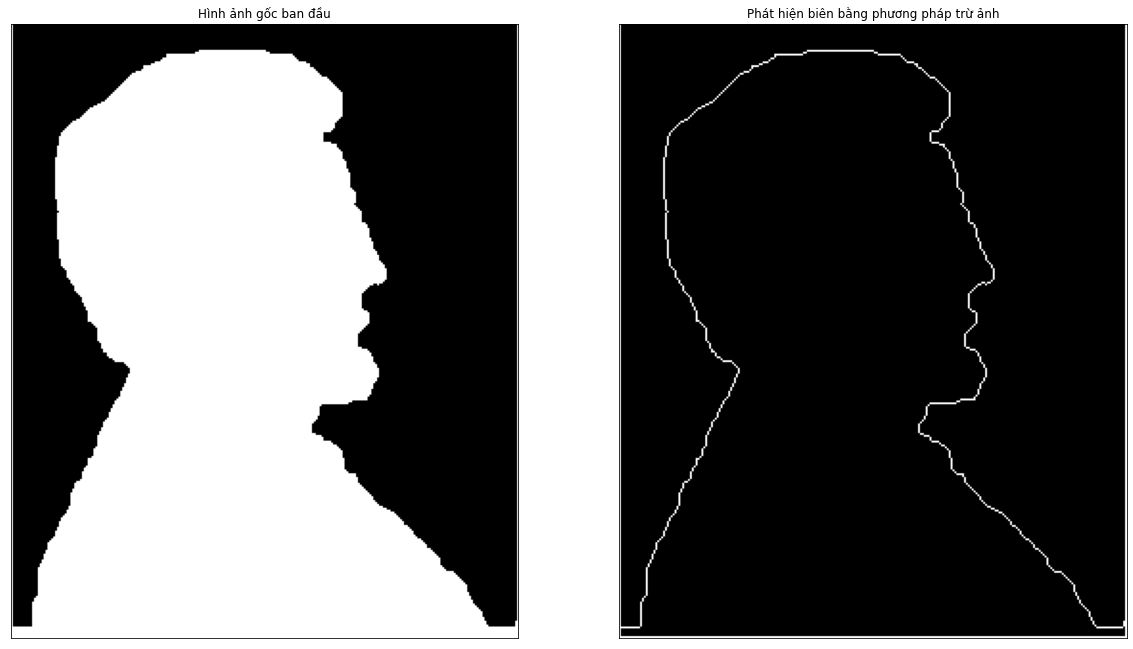

In [ ]:
image31 = copy.copy(image3)
image31 = TruAnhErosion(image31,B1)

plt.figure(figsize=(20,20))
plt.subplot(121) , plt.imshow(image3, cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(image31, cmap="gray"), plt.title("Phát hiện biên bằng phương pháp trừ ảnh")
plt.xticks([]), plt.yticks([])
plt.show()